<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.202801,22.548541,23.417917,62.102989,2.409910,164.682157,160.905730,3.776427
1,0.0,1.0,95.235106,65.956753,76.372251,45.080897,3.546367,296.191374,293.825736,2.365638
2,0.0,2.0,94.109022,72.160932,63.958840,57.467514,0.662243,298.358551,298.888730,-0.530179
3,0.0,3.0,81.530503,29.925862,26.695702,44.082264,-0.319249,191.915082,191.674984,0.240097
4,0.0,4.0,23.328334,72.026812,74.016999,85.433229,1.935679,266.741052,264.883594,1.857458
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.153770,84.307466,64.833760,43.897266,-0.335152,266.857110,266.395010,0.462100
29996,999.0,26.0,81.386356,57.472420,38.715860,21.178698,0.330144,209.083477,207.474357,1.609120
29997,999.0,27.0,89.371569,33.531439,99.545572,77.974946,-1.571264,308.852262,310.290172,-1.437911
29998,999.0,28.0,64.374500,51.192586,33.079632,29.751463,-4.292364,184.105818,187.914744,-3.808926


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.202801,22.548541,23.417917,62.102989,2.409910,164.682157,160.905730,3.776427
1,0.0,1.0,95.235106,65.956753,76.372251,45.080897,3.546367,296.191374,293.825736,2.365638
2,0.0,2.0,94.109022,72.160932,63.958840,57.467514,0.662243,298.358551,298.888730,-0.530179
3,0.0,3.0,81.530503,29.925862,26.695702,44.082264,-0.319249,191.915082,191.674984,0.240097
4,0.0,4.0,23.328334,72.026812,74.016999,85.433229,1.935679,266.741052,264.883594,1.857458
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.153770,84.307466,64.833760,43.897266,-0.335152,266.857110,266.395010,0.462100
29996,999.0,26.0,81.386356,57.472420,38.715860,21.178698,0.330144,209.083477,207.474357,1.609120
29997,999.0,27.0,89.371569,33.531439,99.545572,77.974946,-1.571264,308.852262,310.290172,-1.437911
29998,999.0,28.0,64.374500,51.192586,33.079632,29.751463,-4.292364,184.105818,187.914744,-3.808926


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.202801,22.548541,23.417917,62.102989,2.409910,164.682157,160.905730,3.776427
1,0.0,1.0,95.235106,65.956753,76.372251,45.080897,3.546367,296.191374,293.825736,2.365638
2,0.0,2.0,94.109022,72.160932,63.958840,57.467514,0.662243,298.358551,298.888730,-0.530179
3,0.0,3.0,81.530503,29.925862,26.695702,44.082264,-0.319249,191.915082,191.674984,0.240097
4,0.0,4.0,23.328334,72.026812,74.016999,85.433229,1.935679,266.741052,264.883594,1.857458
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.153770,84.307466,64.833760,43.897266,-0.335152,266.857110,266.395010,0.462100
29996,999.0,26.0,81.386356,57.472420,38.715860,21.178698,0.330144,209.083477,207.474357,1.609120
29997,999.0,27.0,89.371569,33.531439,99.545572,77.974946,-1.571264,308.852262,310.290172,-1.437911
29998,999.0,28.0,64.374500,51.192586,33.079632,29.751463,-4.292364,184.105818,187.914744,-3.808926


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

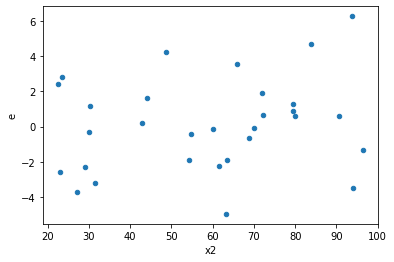

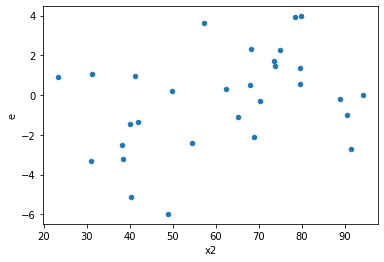

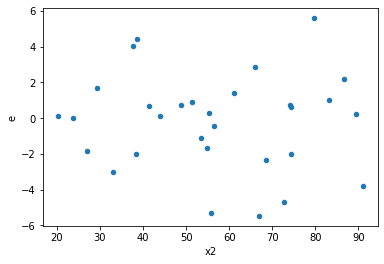

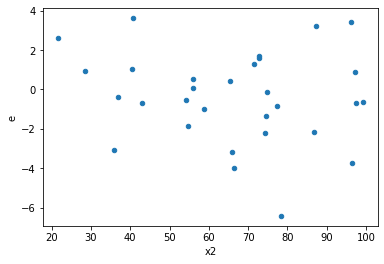

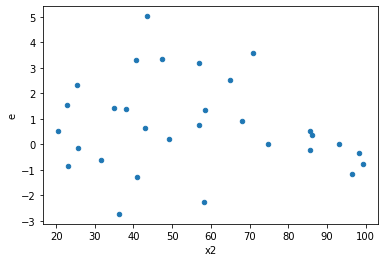

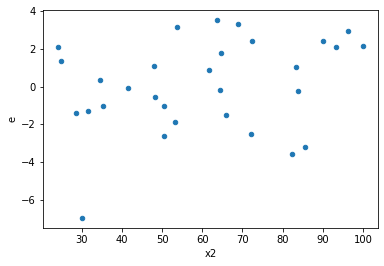

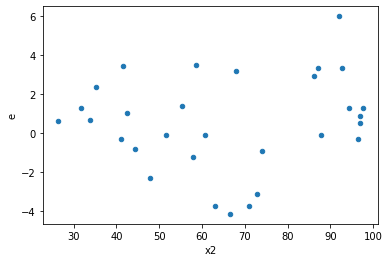

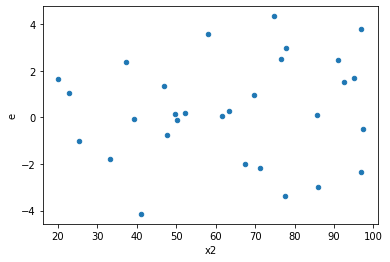

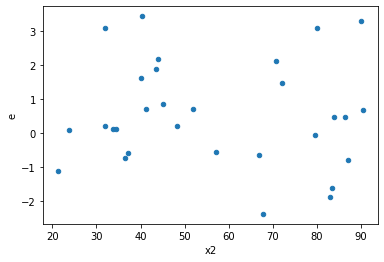

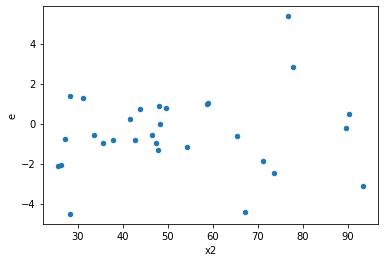

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,46.70785164501768,50.803496737710354,5.83848145562721,6.350437092213794,1.0876864370431722,0.9082831368792106,0.5458584315603947,0.4541415684396053,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,29.34965272533889,30.10536456106564,3.668706590667361,3.763170570133205,1.0257485784516391,0.9721999477420802,0.5139000261289599,0.4860999738710401,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,8.900251682018846,9.600120167358153,1.1125314602523557,1.200015020919769,1.0786346847643926,0.9173652705661932,0.5413173647169034,0.4586826352830966,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,21.219542681769266,43.09073579238003,2.652442835221158,5.386341974047504,2.0307099186167363,0.33629416821488456,0.8318529158925577,0.16814708410744228,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,17.334620345033862,32.809849262260165,2.1668275431292328,4.101231157782521,1.8927353820967732,0.38561532131460274,0.8071923393426986,0.19280766065730137,Reject001=1 : Homoscedasticity
9.0,8.0,8.0,28.691974245656358,54.37002527910731,3.5864967807070447,6.796253159888414,1.894955879076126,0.384756625791161,0.8076216871044195,0.1923783128955805,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,8.54540663378626,38.10219308729864,1.0681758292232826,4.76277413591233,4.458792275215169,0.049188036422187054,0.9754059817889065,0.024594018211093527,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,33.62669043195919,33.70779141195978,4.203336303994899,4.213473926494973,1.0024118038069996,0.9973652706380571,0.5013173646809714,0.49868263531902857,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,30.56962546280628,39.2390277289993,3.821203182850785,4.904878466124912,1.2835953053052933,0.732489704306281,0.6337551478468595,0.3662448521531405,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,46.70785164501768,50.803496737710354,5.83848145562721,6.350437092213794,1.0876864370431722,0.9082831368792106,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,29.34965272533889,30.10536456106564,3.668706590667361,3.763170570133205,1.0257485784516391,0.9721999477420802,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,88.2979529478494,46.157620126909464,11.037244118481174,5.769702515863683,0.522748473616043,0.3778744004323143,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,58.81362854933508,10.893102912245547,7.351703568666885,1.3616378640306934,0.18521392372701515,0.028036479118859377,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,8.900251682018846,9.600120167358153,1.1125314602523557,1.200015020919769,1.0786346847643926,0.9173652705661932,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,53.30975305069392,43.37803240879698,6.66371913133674,5.422254051099623,0.8136978681470809,0.7776569940167295,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,44.52360700201343,37.97046146355939,5.5654508752516785,4.746307682944924,0.8528163825954691,0.8273222662389456,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,21.219542681769266,43.09073579238003,2.652442835221158,5.386341974047504,2.0307099186167363,0.33629416821488456,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,17.334620345033862,32.809849262260165,2.1668275431292328,4.101231157782521,1.8927353820967732,0.38561532131460274,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64